In [11]:
# Standard imports for computation physics
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import typing
import scienceplots

# Pretty styling for graphs
plt.style.use(['science', 'grid', 'notebook'])
plt.rcParams["figure.figsize"] = (12, 8)

## 2.1 Sequence of Fair Coin Flips

## 2.4 Inverse Transform Sampling

The CDF of some distribution we are interested in sampling from is given by
$$CDF_{µ,s}(x) =\left(\frac{1 + tanh \frac{x−µ}{2s}}{2}\right)^2$$
which is the square of the CDF of the logistic distribution. I just made this CDF up, so who knows what
the PDF is?! I don’t! (Yet; you’ll compute it below.) Nevertheless, let’s generate samples according to its
PDF.<br>
Let µ = 0, and s = 3

In [12]:
#define the PDF and CDF 
def CDF_distribution(x,mu,s):
    return ((1+np.tanh((x-mu)/(2*s)))/2)**2

def PDF_distribution(x,mu,s): #calculated analytically
    return (np.tanh((x-mu)/(2*s))+1)*(1/np.cosh((x-mu)/(2*s)))**2/(4*s)

<font color="blue"> **Q. Draw $ 10^5 $ samples of u from the uniform distribution on [0, 1], which is the range of the CDF.For each sample compute $x = \text{CDF}^{−1}_{µ,s}(u)$.**</font>


In [13]:
#draw the random numbers from uniform distributions
number_of_points=10**5
uniform_samples = np.random.uniform(low=0, high=1, size=(number_of_points,))

#invert the CDF. Rather than find a formula, just solve CDF(x)-u = 0 for u in the uniform samples.
preimage = np.fromiter(
    (optimize.fsolve(
        lambda x: CDF_distribution(x,mu=0,s=3)-u,
        (0,)
    )[0] for u in uniform_samples),
    dtype=float
    )

<font color='blue'>**Q. To make sure you’ve succeeded in applying the inverse, make a scatter plot of $(x, u)$
 on top of a plot of the CDF.**</font>

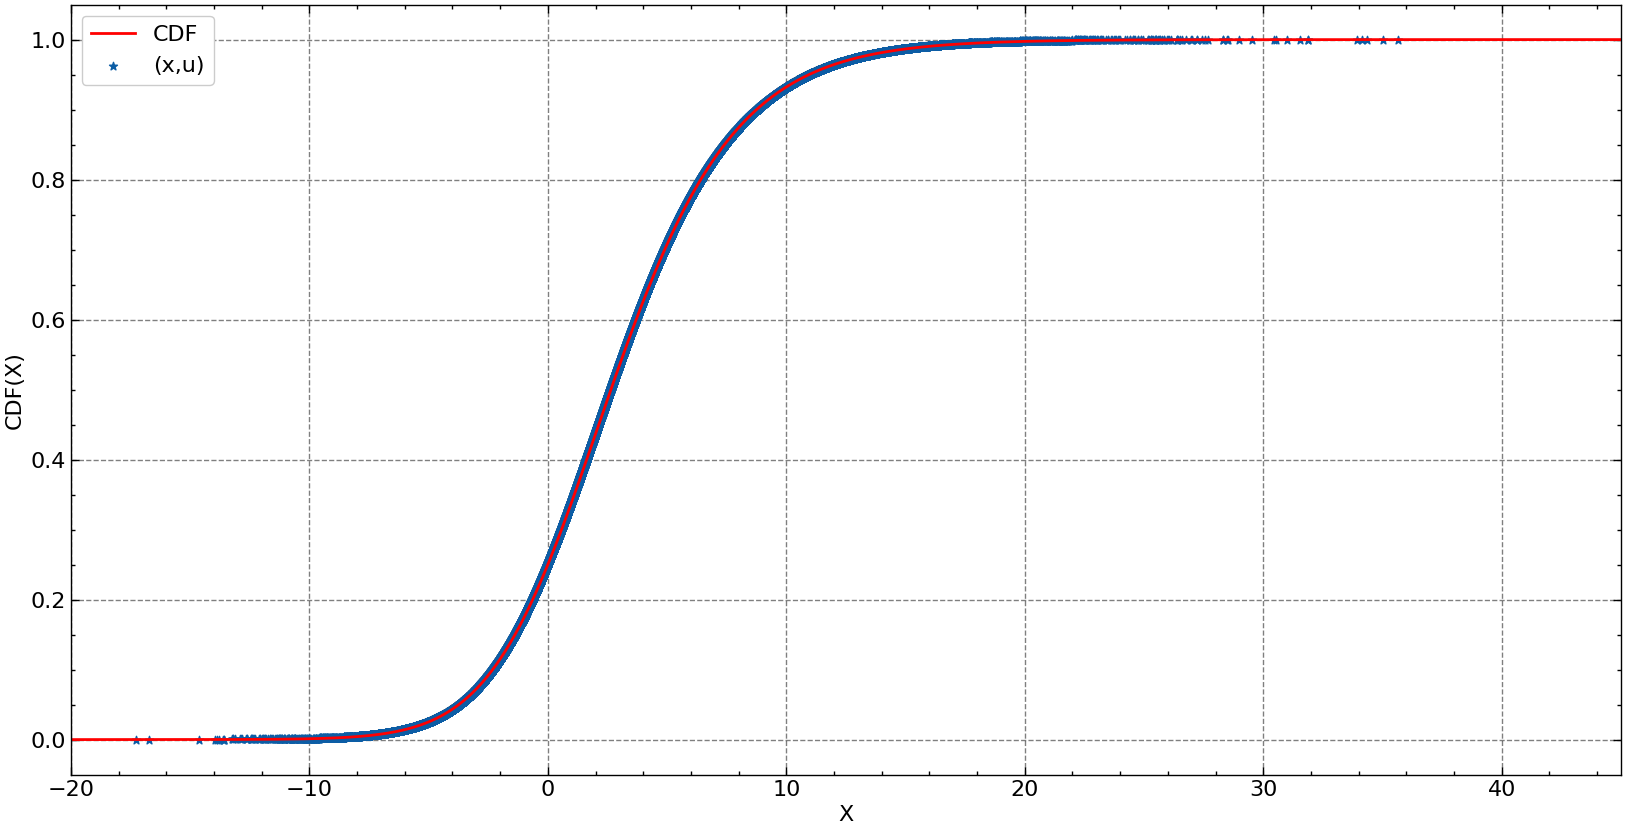

In [14]:
#draw the CDF_distribution
fig, ax = plt.subplots()
fig.set_size_inches(20,10)

X = np.linspace(-20, 45, 1000)

ax.plot(X, CDF_distribution(X,mu=0,s=3),color='red',label="CDF")
ax.set_xlim([-20,45])

#draw the scatter plot of (u,x) 
ax.scatter(preimage,uniform_samples,marker='*',label=r'(x,u)')
ax.set_ylabel('CDF(X)')
ax.set_xlabel('X')
ax.legend()

<font color='blue'>**Q. Make a histogram of $x$. Indicate the mean of the samples.**<br>
**Q. Compute the PDF analytically and draw it on top of your histogram. Be honest and do this part last so that you are really checking your sampling!**</font>

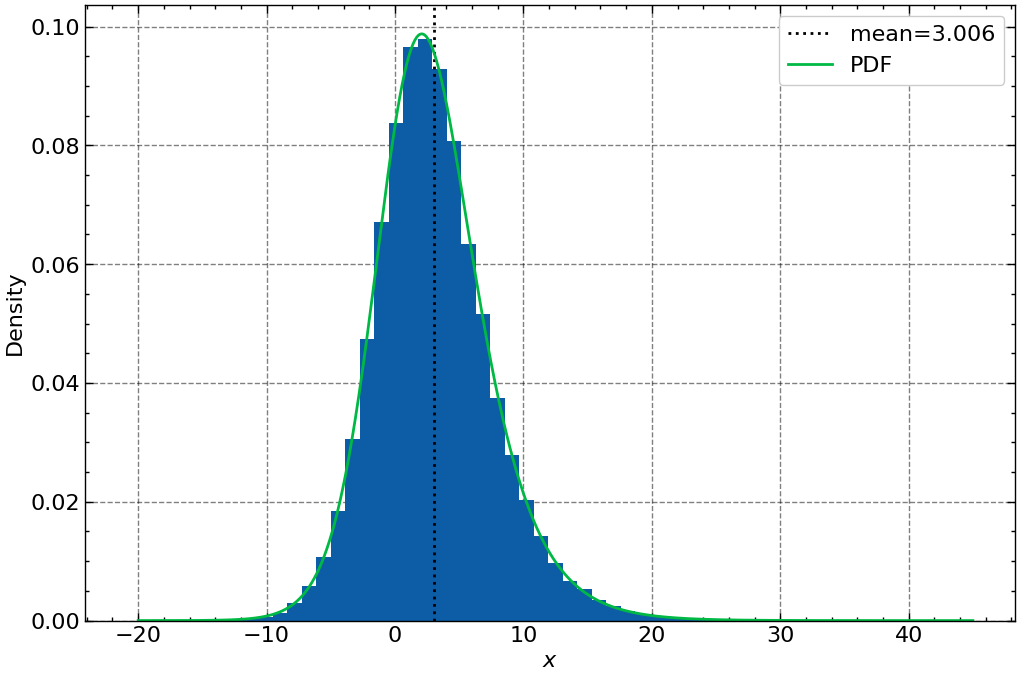

In [15]:
#make histogram of x and indicate the mean of samples
fig, ax = plt.subplots()

ax.hist(preimage,bins=50, density=True)
ax.set_xlabel('$x$')
ax.set_ylabel("Density")

plt.axvline(preimage.mean(), color='black', zorder=1, linestyle=':',label=f"mean={preimage.mean():.3f}")

#draw PDF distribution
ax.plot(X, PDF_distribution(X,mu=0,s=3),label="PDF")

plt.legend()
plt.show()
